In [2]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
# Load the trained randomForest pipeline
svmModel = joblib.load('svm.joblib')

# Load test dataset
test_df = pd.read_csv("../../../data/test_data.csv")

# Predict using raw text
X_test = test_df["text"].astype(str)
y_true = test_df["Analysis"]
y_pred = svmModel.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred))

Accuracy: 0.7559339525283798
Confusion Matrix:
 [[216  36 179]
 [ 19 319 112]
 [ 60  67 930]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.73      0.50      0.60       431
     Neutral       0.76      0.71      0.73       450
    Positive       0.76      0.88      0.82      1057

    accuracy                           0.76      1938
   macro avg       0.75      0.70      0.71      1938
weighted avg       0.75      0.76      0.75      1938



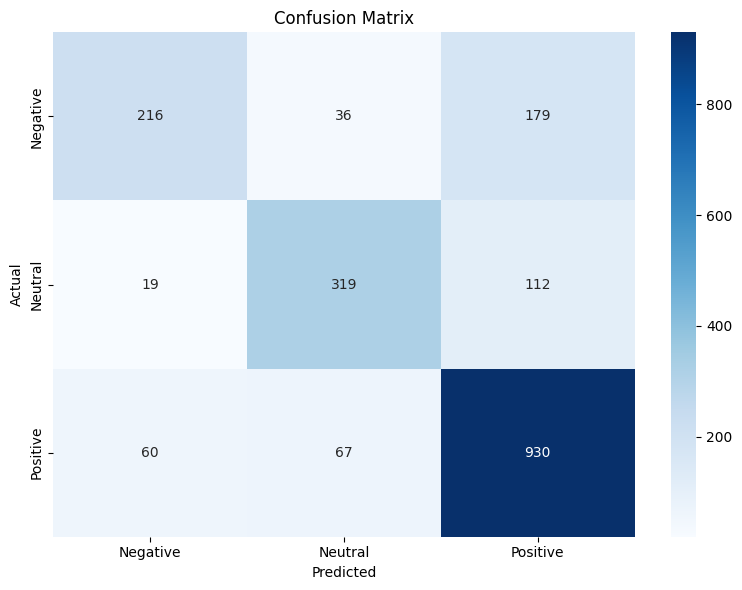

In [4]:
# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=svmModel.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=svmModel.classes_, # 
            yticklabels=svmModel.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion_matrix_svm.png")
plt.show()

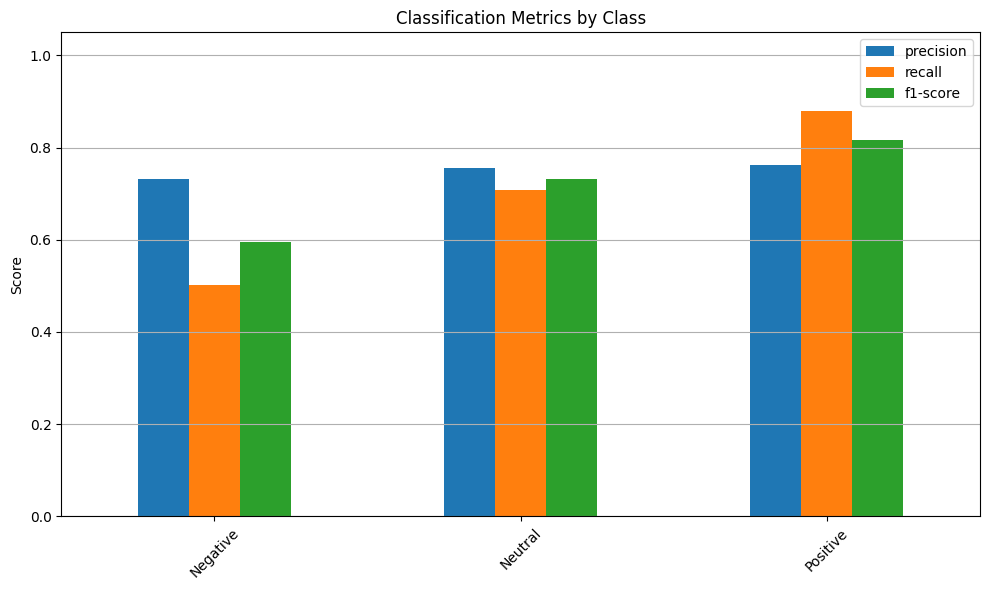

In [5]:
# Generate classification report
report_dict = classification_report(y_true, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Filter only class rows (skip avg/accuracy rows)
class_rows = report_df.iloc[:-3, :]

# Plot precision, recall, f1-score per class
class_rows[["precision", "recall", "f1-score"]].plot(kind='bar', figsize=(10, 6))
plt.title("Classification Metrics by Class")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("classification_report_svm.png")
plt.show()
